<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/VAR(VectorAutoRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/M2SLMoneyStock.csv", index_col=0, parse_dates=True)
data.index.freq = 'MS'
data.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [26]:
data_1 = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/PCEPersonalSpending.csv", index_col=0, parse_dates=True)
data_1.index.freq = 'MS'
data_1.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Money   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [28]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Spending  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [29]:
# join dataframe 
data = data.join(data_1)
data.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


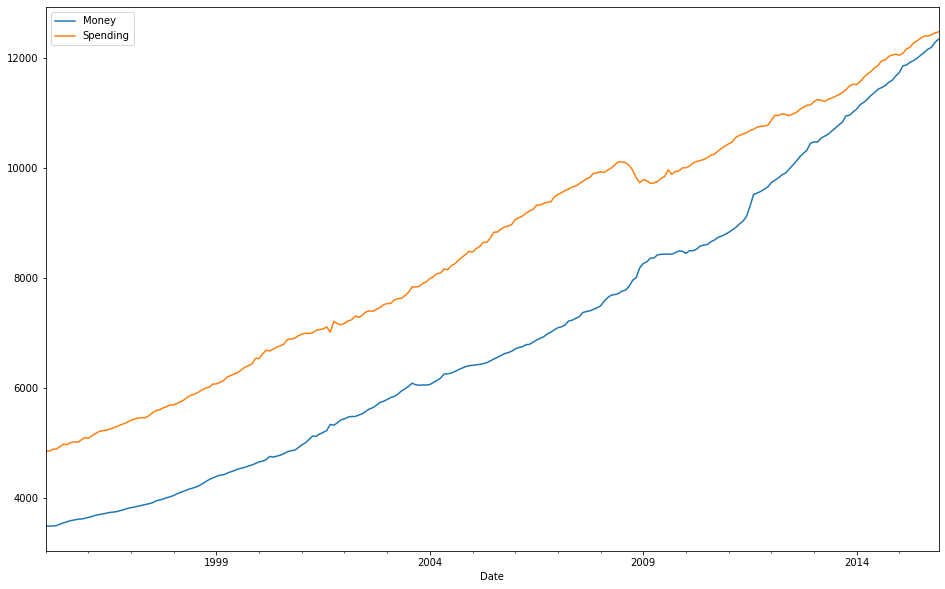

In [30]:
data.plot(figsize=(16,10))

In [31]:
def adf_test(series, title=''):
    """
    pass time series and titile is optional
    return ADF report
    """
    print(f'Augmented Dickey-Fuller test : {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    # AIC auto choose lags
    label = ['ADF test statistics', 'p_value', 'lags_used', 'observations']
    out = pd.Series(result[0:4], index=label)

    # iterate adfuller test dict
    for key, val in result[4].items():
        out[f'critical_value({key})'] = val
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data a unit root and is non-stationay')

In [32]:
adf_test(data['Money'])

Augmented Dickey-Fuller test : 
ADF test statistics      4.239022
p_value                  1.000000
lags_used                4.000000
observations           247.000000
critical_value(1%)      -3.457105
critical_value(5%)      -2.873314
critical_value(10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data a unit root and is non-stationay


In [33]:
adf_test(data['Spending'])

Augmented Dickey-Fuller test : 
ADF test statistics      0.149796
p_value                  0.969301
lags_used                3.000000
observations           248.000000
critical_value(1%)      -3.456996
critical_value(5%)      -2.873266
critical_value(10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data a unit root and is non-stationay


In [34]:
# first order diff()
data_tranformed = data.diff()
print(data.head())
print(data_tranformed.head())

             Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1
            Money  Spending
Date                       
1995-01-01    NaN       NaN
1995-02-01   -2.5      -0.4
1995-03-01    1.2      34.6
1995-04-01    8.1       4.8
1995-05-01   25.0      42.9


In [35]:
# second order diff()
print(data_tranformed.head())
data_tranformed = data_tranformed.diff()
print(data_tranformed.head())

            Money  Spending
Date                       
1995-01-01    NaN       NaN
1995-02-01   -2.5      -0.4
1995-03-01    1.2      34.6
1995-04-01    8.1       4.8
1995-05-01   25.0      42.9
            Money  Spending
Date                       
1995-01-01    NaN       NaN
1995-02-01    NaN       NaN
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1


In [37]:
data_tranformed = data_tranformed.dropna()
data_tranformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [40]:
adf_test(data_tranformed['Money'])

Augmented Dickey-Fuller test : 
ADF test statistics   -7.077471e+00
p_value                4.760675e-10
lags_used              1.400000e+01
observations           2.350000e+02
critical_value(1%)    -3.458487e+00
critical_value(5%)    -2.873919e+00
critical_value(10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [41]:
adf_test(data_tranformed['Spending'])

Augmented Dickey-Fuller test : 
ADF test statistics   -8.760145e+00
p_value                2.687900e-14
lags_used              8.000000e+00
observations           2.410000e+02
critical_value(1%)    -3.457779e+00
critical_value(5%)    -2.873609e+00
critical_value(10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [42]:
# train test split
num_obs = 12
train_data = data_tranformed[:-num_obs] # start from beg and end before last 12
test_data = data_tranformed[-num_obs:]

**Grid search for order p AR of VAR model**

In [44]:
# for model need pass p value

model = VAR(train_data)

for p in [1,2,3,4,5,6,7]:
    result = model.fit(p)
    print(f'Order\t: {p}')
    print(f'AIC\t: {result.aic}')
    print('\n')

Order	: 1
AIC	: 14.178610495220896


Order	: 2
AIC	: 13.955189367163705


Order	: 3
AIC	: 13.849518291541038


Order	: 4
AIC	: 13.827950574458281


Order	: 5
AIC	: 13.78730034460964


Order	: 6
AIC	: 13.799076756885809


Order	: 7
AIC	: 13.797638727913972




In [45]:
result = model.fit(5)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 17, Nov, 2020
Time:                     06:57:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [51]:
# steps =  forcasting period
# y = nparray(p * k) p is 5  and k is 2 (money and spending)

# grab 5 lagged values , right before the test start
lagg_values = train_data.values[-5:]

pred = result.forecast(y=lagg_values, steps=12)

# convert to data frmae
# 2015-01-01 test test start

idx = pd.date_range('2015-01-01', periods=12, freq='MS')
# 2d diffrencing 2 times
data_forecast = pd.DataFrame(data=pred, index=idx, columns=['Money_2d', 'Spending_2d'])

In [50]:
test_data

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


**Inverse Tranform money_2d and spending_2d**

In [57]:
#money
data_forecast['Money_1D'] = (data['Money'].iloc[-num_obs-1] - data['Money'].iloc[-num_obs-2]) + data_forecast['Money_2d'].cumsum()
data_forecast['MoneyForecast'] = data['Money'].iloc[-num_obs-2] + data_forecast['Money_1D'].cumsum()
# spending
data_forecast['Spending_1D'] = (data['Spending'].iloc[-num_obs-1] - data['Spending'].iloc[-num_obs-2]) + data_forecast['Spending_2d'].cumsum()
data_forecast['SpendingForecast'] = data['Spending'].iloc[-num_obs-2] + data_forecast['Spending_1D'].cumsum()
data_forecast.head()

,Money_2d,Spending_2d,Money_1D,MoneyForecast,Spending_1D,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11653.104724,46.749820,12098.149820
2015-02-01,-3.174038,-11.450298,58.430686,11711.535410,35.299522,12133.449342
2015-03-01,-0.377725,-6.684969,58.052961,11769.588371,28.614552,12162.063894
2015-04-01,-2.602233,5.479458,55.450728,11825.039099,34.094010,12196.157904
2015-05-01,4.228557,-2.443365,59.679285,11884.718384,31.650645,12227.808549


In [60]:
print(data['Money'].iloc[-num_obs-1])
print(data['Money'].iloc[-num_obs-2])

11670.1
11591.5


In [64]:
test_range = data[-num_obs:]

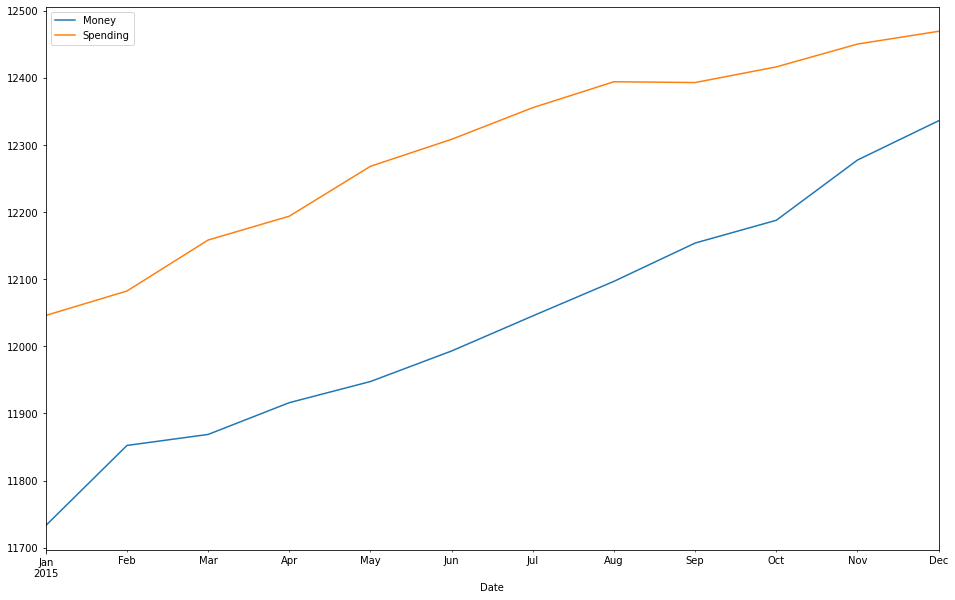

In [68]:
test_range.plot(figsize=(16,10))

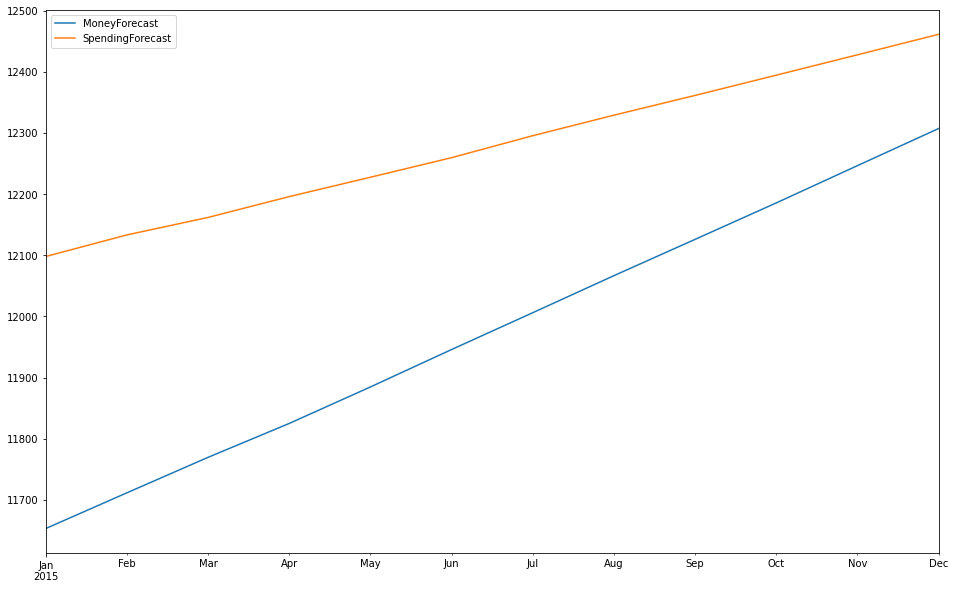

In [69]:
data_forecast[['MoneyForecast', 'SpendingForecast']].plot(figsize=(16,10))

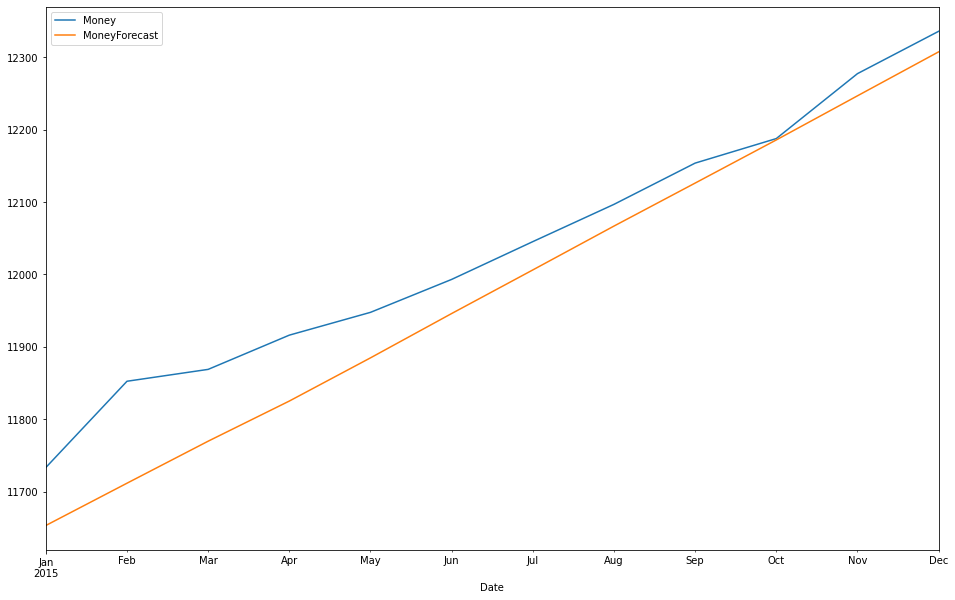

In [70]:
test_range['Money'].plot(figsize=(16,10), legend=True)
data_forecast['MoneyForecast'].plot(legend=True)

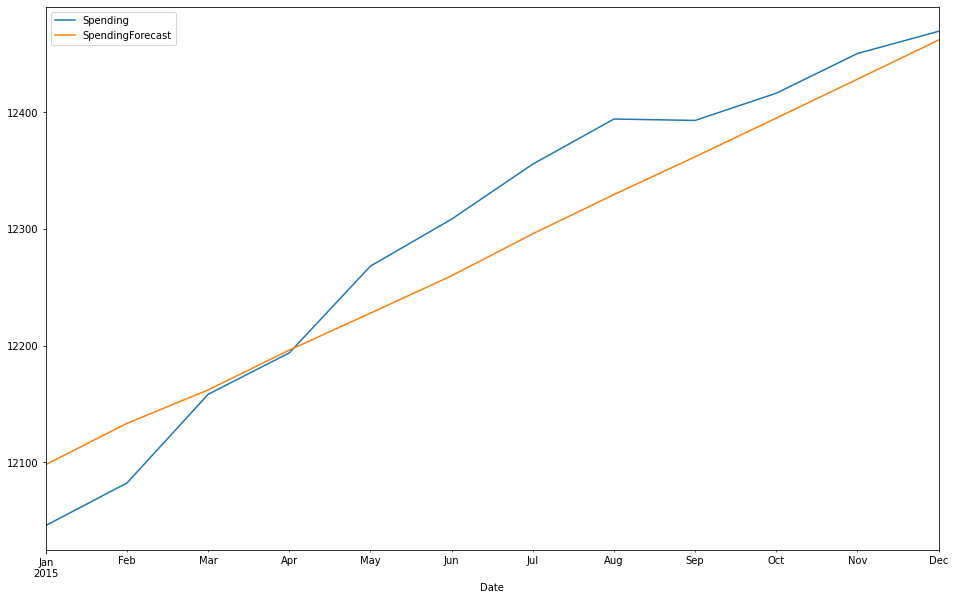

In [71]:
test_range['Spending'].plot(figsize=(16,10), legend=True)
data_forecast['SpendingForecast'].plot(legend=True)

In [72]:
rmse(test_range['Money'], data_forecast['MoneyForecast'])

68.01202664581686

In [73]:
test_range['Money'].mean()

12034.008333333333

In [75]:
rmse(test_range['Spending'], data_forecast['SpendingForecast'])

39.807004771201385

In [76]:
test_range['Spending'].mean()

12294.533333333333